In [2]:
# Author: Meduri Venkata Shivaditya

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as tr
import os

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml


figdir = "figures"
figdir = "/Users/kpmurphy/github/bookv2/figures"


def savefig(fname):
    plt.savefig(os.path.join(figdir, fname))

In [3]:
def range_chebyshev(a, b, steps):
    """
    Create a grid point of N+1 values
    """
    theta_vals = np.arange(steps + 1) * np.pi / steps
    x_vals = (a + b) / 2 + (a - b) / 2 * np.cos(theta_vals)
    return x_vals


def plot_ellipses(x0, y0, a, b, r, lim=5, steps=50000, **kwargs):
    """
    Plot an ellipses of the form
        a(x - x0) ^ 2 + b(y - y0) ^ 2 = r^2
    """
    xrange = range_chebyshev(-lim, lim, steps)
    yrange_up = np.sqrt(b * (r**2 - a * (xrange - x0) ** 2)) / b + y0
    yrange_down = -np.sqrt(b * (r**2 - a * (xrange - x0) ** 2)) / b + y0
    plt.text(0.02, 0.1, "μ", fontsize=12)
    plt.plot(xrange, yrange_up, **kwargs)
    plt.plot(xrange, yrange_down, **kwargs)

<ipython-input-3-a1a26ed6453a>:16: RuntimeWarning: invalid value encountered in sqrt
  yrange_up = np.sqrt(b * (r**2 - a * (xrange - x0) ** 2)) / b + y0
<ipython-input-3-a1a26ed6453a>:17: RuntimeWarning: invalid value encountered in sqrt
  yrange_down = -np.sqrt(b * (r**2 - a * (xrange - x0) ** 2)) / b + y0
/opt/anaconda3/lib/python3.8/site-packages/probml_utils/plotting.py:84: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


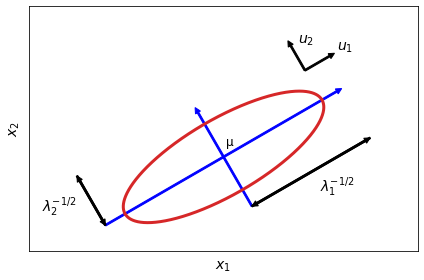

In [7]:
base = plt.gca().transData
rot = tr.Affine2D().rotate_deg(30)
plot_ellipses(0, 0, 9, 81, 3, c="tab:red", linewidth=3.0, transform=rot + base)
plt.arrow(
    -1.2,
    0,
    2.4,
    0,
    length_includes_head=True,
    width=0.015,
    head_width=0.05,
    head_length=0.05,
    color="blue",
    transform=rot + base,
)
plt.arrow(
    0,
    -0.5,
    0,
    1,
    length_includes_head=True,
    width=0.015,
    head_width=0.05,
    head_length=0.05,
    color="blue",
    transform=rot + base,
)
plt.arrow(
    -1.2,
    0,
    0,
    0.5,
    length_includes_head=True,
    width=0.015,
    head_width=0.05,
    head_length=0.05,
    color="black",
    transform=rot + base,
)
plt.arrow(
    0,
    -0.5,
    1.2,
    0,
    length_includes_head=True,
    width=0.015,
    head_width=0.05,
    head_length=0.05,
    color="black",
    transform=rot + base,
)
plt.arrow(
    -1.2,
    0.5,
    0,
    -0.5,
    length_includes_head=True,
    width=0.015,
    head_width=0.05,
    head_length=0.05,
    color="black",
    transform=rot + base,
)
plt.arrow(
    1.2,
    -0.5,
    -1.2,
    0,
    length_includes_head=True,
    width=0.015,
    head_width=0.05,
    head_length=0.05,
    color="black",
    transform=rot + base,
)
plt.arrow(
    1,
    0.3,
    0,
    0.3,
    length_includes_head=True,
    width=0.015,
    head_width=0.05,
    head_length=0.05,
    color="black",
    transform=rot + base,
)
plt.text(0.658, 1, r"$u_2$", fontsize=14)
plt.text(1, 0.94, r"$u_1$", fontsize=14)
plt.text(-1.6, -0.48, r"$λ_2^{-1/2}$", fontsize=14)
plt.text(0.85, -0.3, r"$λ_1^{-1/2}$", fontsize=14)
plt.arrow(
    1,
    0.3,
    0.3,
    0,
    length_includes_head=True,
    width=0.015,
    head_width=0.05,
    head_length=0.05,
    color="black",
    transform=rot + base,
)
plt.xticks([])
plt.yticks([])
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
scale_factor = 1.2
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.tight_layout()
pml.savefig("gaussEvec.pdf", dpi=300)
savefig("gaussEvec2.pdf")

plt.show()